In [1]:
import numpy as np
import matplotlib.pyplot as plt

/home/nikolay37/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
def f(x, y):
    return (x**4 * y**2 - x**2 * y - 20) / x**3

In [20]:
def euler_correction_method(f, x0, y0, h, x_end):
    n = int((x_end - x0) / h) + 1
    x = np.linspace(x0, x_end, n)
    y = np.zeros(n)
    y_p=np.zeros(n)
    y[0] = y0
    y_p[0] = y0

    for i in range(n - 1):
        # Прогноз (классический Эйлер)
        y_pred = y[i] + h * f(x[i], y[i])
        # Коррекция (уточнение)
        y[i + 1] = y[i] + h / 2 * (f(x[i], y[i]) + f(x[i + 1], y_pred))
        y_p[i+1] = y_pred

    return x, y, y_p


In [61]:
# Параметры
x0, y0 = 1.0, 4.0
x_end = 2.0
h1 = 0.00025  # Шаг
h2=0.000125

In [62]:
# Решение
x, y, y_p = euler_correction_method(f, x0, y0, h1, x_end)
xl, yl, y_pl = euler_correction_method(f, x0, y0, h2, x_end)

In [65]:
print(np.max(np.abs(y-yl[::2])))
print(np.max(np.abs(y_p-y_pl[::2])))

2.7234329689096448e-05
2.7269467083423926e-05


In [60]:
# Вывод таблицы (первые 10 значений)
print("x \t y_predictor(x)  y(x)")
for xi, yi, y_pi in zip(x[-10:], y_p[-10:], y[-10:]):
    print(f"{xi:.4f} \t {yi:.6f} \t {y_pi:.6f}")

x 	 y_predictor(x)  y(x)
1.9955 	 1.004372 	 1.004372
1.9960 	 1.003869 	 1.003869
1.9965 	 1.003366 	 1.003366
1.9970 	 1.002863 	 1.002863
1.9975 	 1.002361 	 1.002361
1.9980 	 1.001859 	 1.001859
1.9985 	 1.001357 	 1.001357
1.9990 	 1.000856 	 1.000856
1.9995 	 1.000355 	 1.000355
2.0000 	 0.999855 	 0.999855


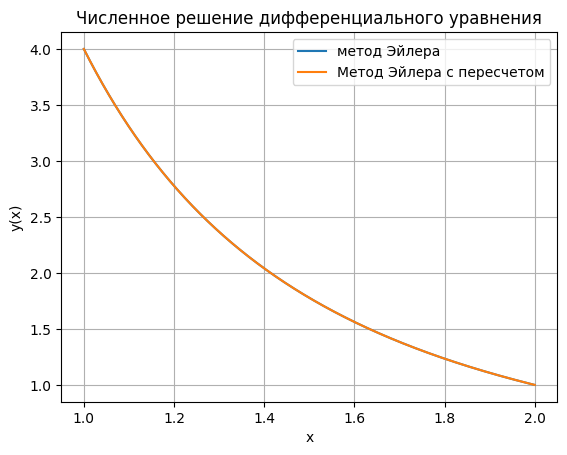

In [64]:
# График
plt.plot(x, y_p, label="метод Эйлера")
plt.plot(x, y, label="Метод Эйлера с пересчетом")
plt.xlabel("x")
plt.ylabel("y(x)")
plt.title("Численное решение дифференциального уравнения")
plt.grid()
plt.legend()
plt.show()

In [ ]:
error = np.abs(y - y_exact)
print(f"Максимальная погрешность: {np.max(error):.6f}")